<a href="https://colab.research.google.com/github/emonsrkr/Student-mental-health/blob/main/notebook117a20c921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to my Notebook.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Overview of the dataset

In [4]:
df = pd.read_csv('student_habits_performance.csv')
df = pd.DataFrame(df)
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [6]:
df['parental_education_level'].describe()

,parental_education_level
count,909
unique,3
top,High School
freq,392


# 2. Filling missing values

In [7]:
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [8]:
df.isna().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [9]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [10]:
cat_col = df.select_dtypes(include='object').columns
cat_col = [col for col in cat_col]
cat_col.remove('student_id')
cat_col

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

# 3. Visualisation of the distributions

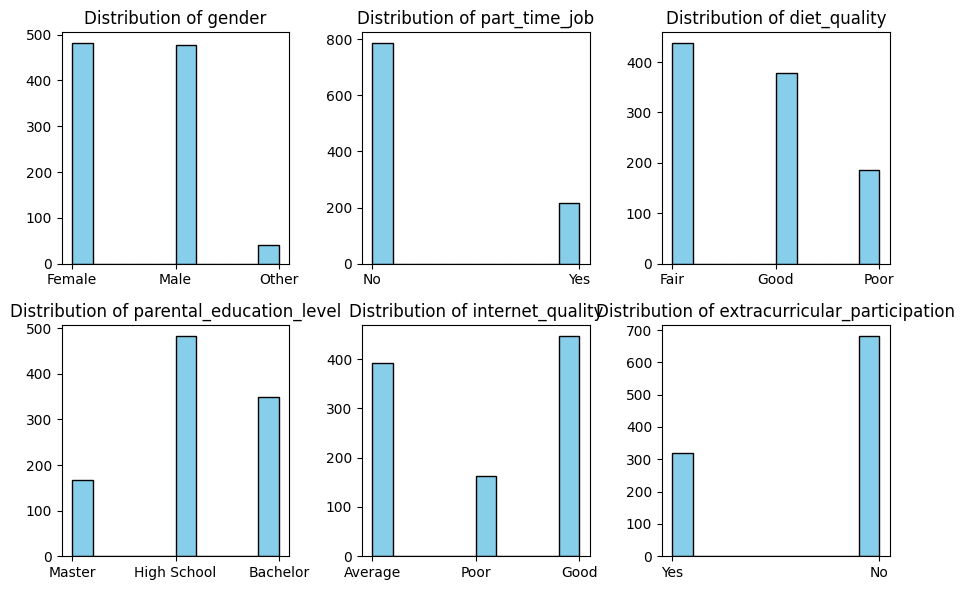

In [11]:
plt.figure(figsize=(9,6))
for i in range(6):
    plt.subplot(2, 3, i+1)  # subplot index starts at 1
    plt.hist(df[cat_col[i]], color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {cat_col[i]}')

plt.tight_layout()
plt.show()  # show all plots at once

In [12]:
num_col = df.select_dtypes(exclude='object').columns
num_col = [col for col in num_col]
num_col

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

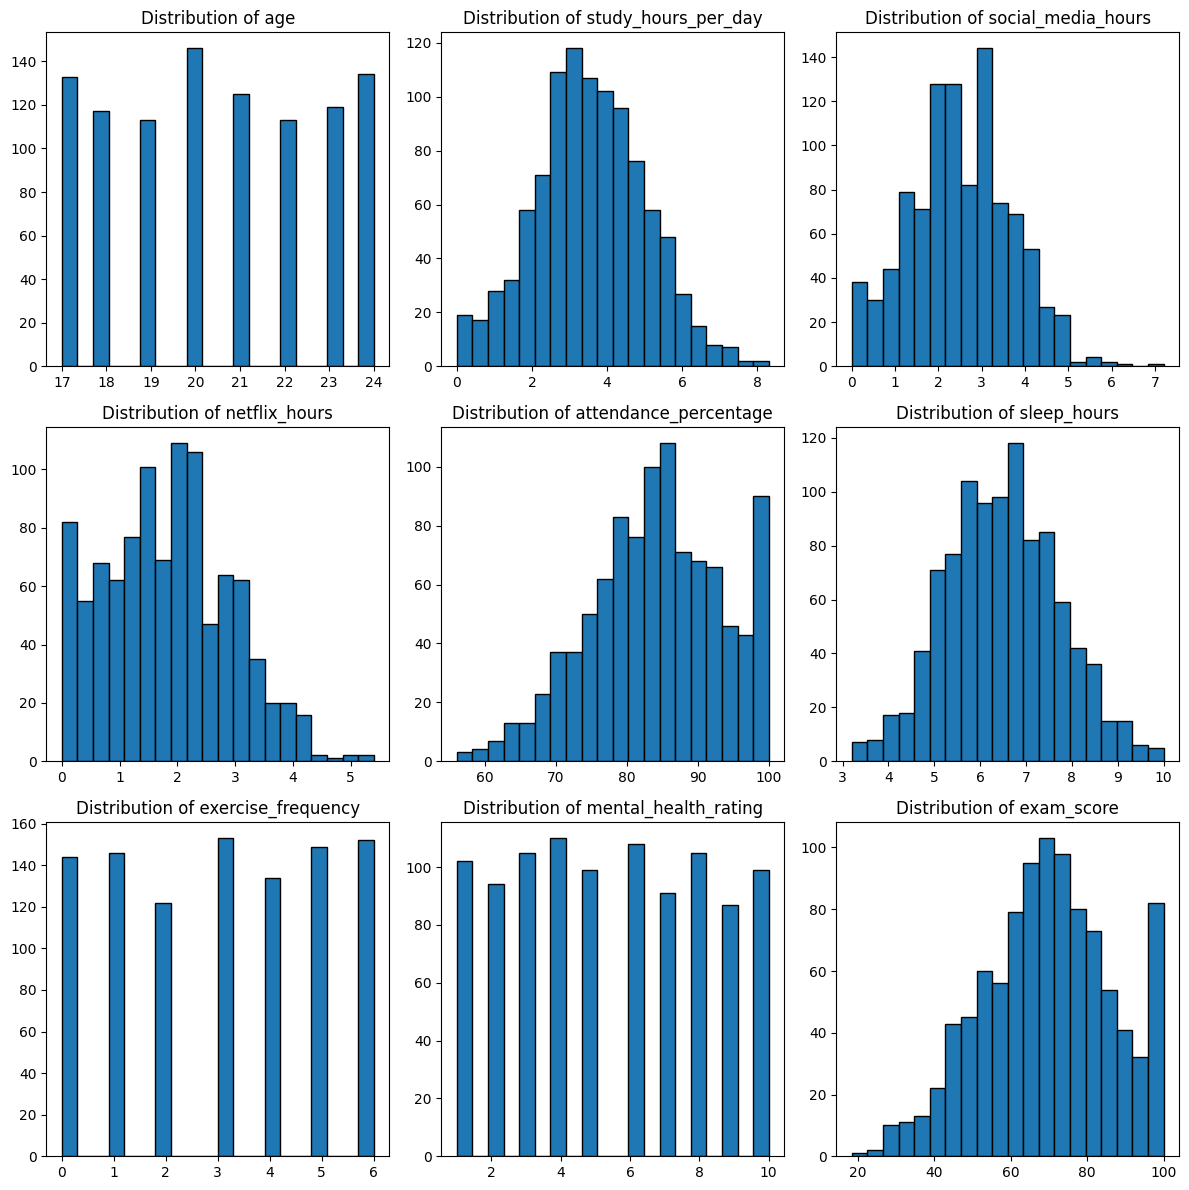

In [13]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3, 3, i+1)  # subplot index starts at 1
    plt.hist(df[num_col[i]],bins=20, edgecolor='black')
    plt.title(f'Distribution of {num_col[i]}')

plt.tight_layout()
plt.show()  # show all plots at once

In [14]:
df2 = df.drop('student_id', axis=1)
df2.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [15]:
df[cat_col].describe()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000
unique,3,2,3,3,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,483,447,682


# 4. Encoding OHE + Label Encoding

In [16]:
for col in cat_col:
    print(col)

gender
part_time_job
diet_quality
parental_education_level
internet_quality
extracurricular_participation


1. Label encoding : diet_quality, parental_education, internet_quality
2. One Hot Encoding : gender, part_time_job, extracurricular_participation

In [17]:
diet_quality = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_level = {'High School' : 0, 'Bachelor' : 1, 'Master' : 2}
internet_quality  = {'Poor' : 0, 'Average' : 1, 'Good' : 2}

In [18]:
df2['dq_e'] = df2['diet_quality'].map(diet_quality)
df2['pel_e'] = df2['parental_education_level'].map(parental_education_level)
df2['iq_e'] = df2['internet_quality'].map(internet_quality)

In [19]:
dummies = pd.get_dummies(df[['gender', 'part_time_job', 'extracurricular_participation']], drop_first=True)

In [20]:
dummies.head()

,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,False,False,False,True
1,False,False,False,False
2,True,False,False,False
3,False,False,False,True
4,False,False,False,False


In [21]:
df3 = pd.concat([df2,dummies], axis=1)

In [22]:
df3 = df3.drop(['gender',
          'part_time_job',
          'diet_quality',
          'parental_education_level',
          'internet_quality',
          'extracurricular_participation'], axis=1)

# 5. Correlation Heatmap

<Axes: >

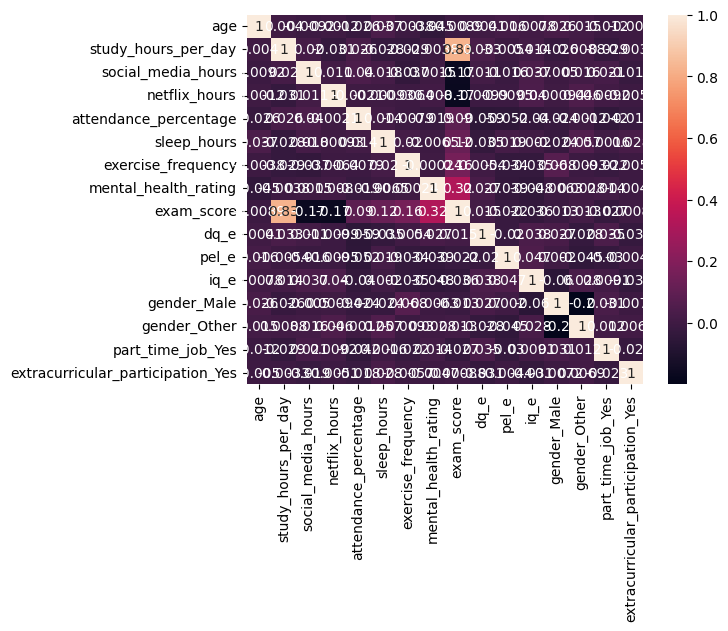

In [23]:
corr = df3.corr()
sns.heatmap(corr, annot=True)

In [24]:
df4 = df3 # .drop('study_hours_per_day', axis=1)

In [25]:
df4.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,dq_e,pel_e,iq_e,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,2,1,False,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,0,1,False,False,False,False
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0,True,False,False,False
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,2,False,False,False,True
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,2,2,False,False,False,False


In [26]:
X = df4.drop('exam_score', axis=1)
y = df4['exam_score']
X.shape, y.shape

((1000, 15), (1000,))

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape  # this will show the shape after scaling

(1000, 15)

# 6. Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 15), (200, 15), (800,), (200,))

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.8988342264221522

# 7. Model training and score comparison

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Try multiple models
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} → R²: {r2_score(y_test, y_pred):.3f}, RMSE: {mean_squared_error(y_test, y_pred):.2f}")

Linear → R²: 0.899, RMSE: 25.94
Ridge → R²: 0.899, RMSE: 25.95
Lasso → R²: 0.898, RMSE: 26.03
Random Forest → R²: 0.810, RMSE: 48.76


Missing Values Check

In [32]:
df.isnull().sum()


,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


Duplicate Data Check

In [33]:
df.duplicated().sum()


np.int64(0)

Data Types Summary


In [34]:
df.dtypes


,0
student_id,object
age,int64
gender,object
study_hours_per_day,float64
social_media_hours,float64
netflix_hours,float64
part_time_job,object
attendance_percentage,float64
sleep_hours,float64
diet_quality,object


Unique Values of Each Column

In [35]:
df.nunique()


,0
student_id,1000
age,8
gender,3
study_hours_per_day,78
social_media_hours,60
netflix_hours,51
part_time_job,2
attendance_percentage,320
sleep_hours,68
diet_quality,3


Countplot for Categorical Columns

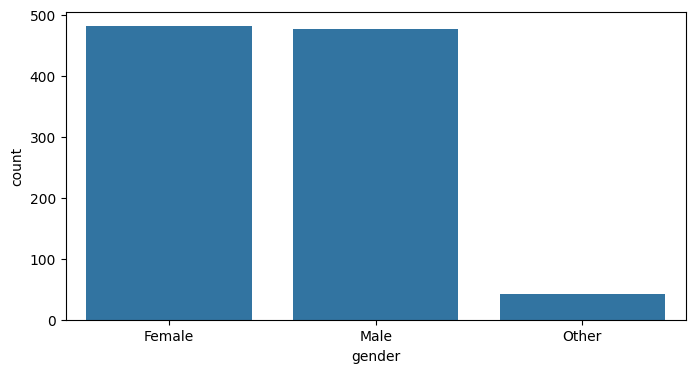

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='gender')
plt.show()


Boxplot for Outlier Detection


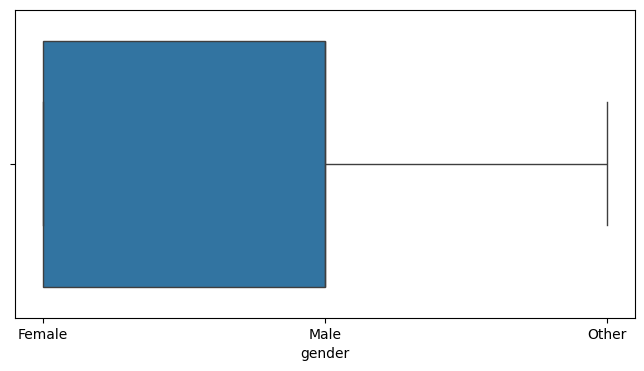

In [40]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='gender')
plt.show()


Pairplot (Full Dataset Relationships)

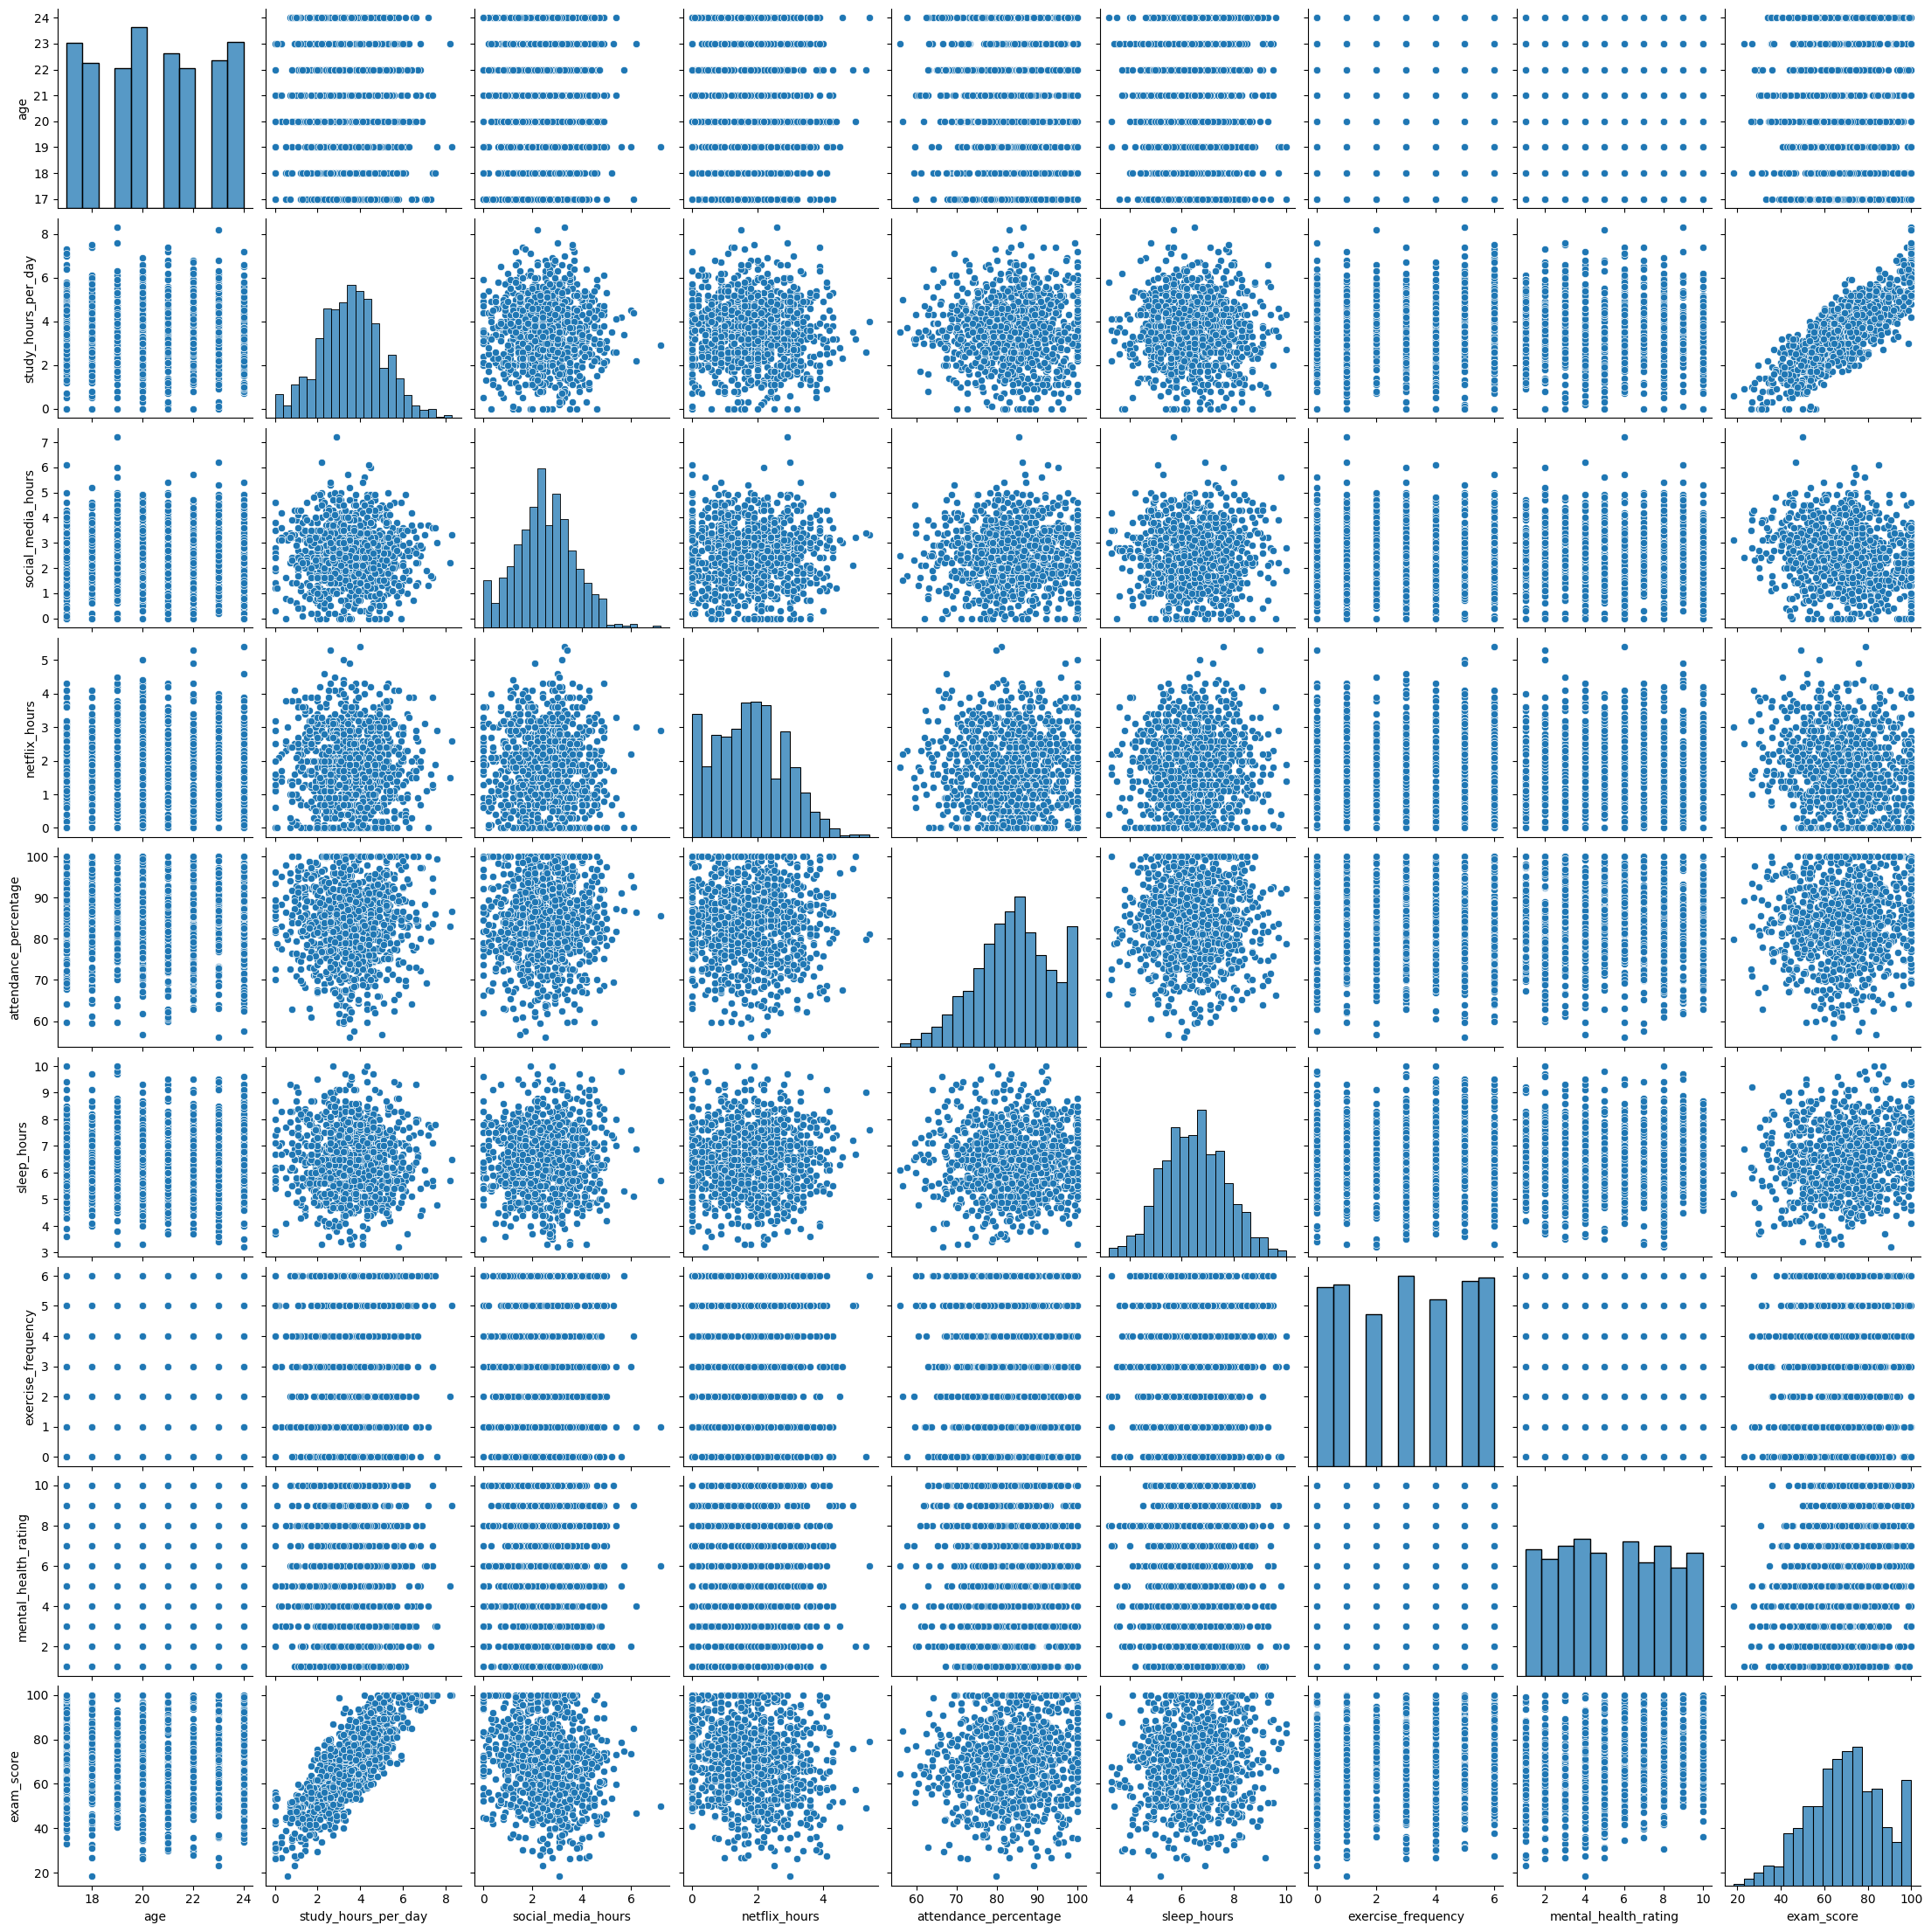

In [41]:
sns.pairplot(df)


Correlation Matrix (Numeric Only)

In [42]:
df.corr(numeric_only=True)


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


Heatmap with Style

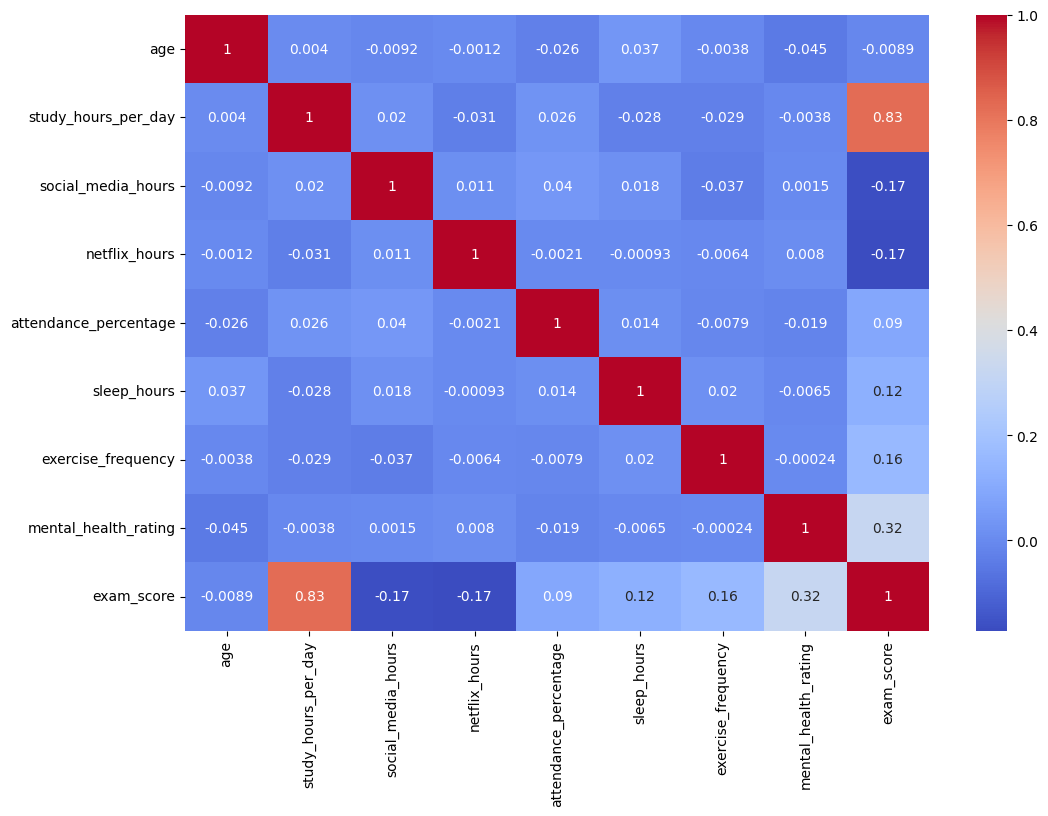

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


Outlier Detection using IQR

In [45]:
col = 'study_hours_per_day'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df[col] < Q1 - 1.5*IQR) |
              (df[col] > Q3 + 1.5*IQR)]

outliers


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
73,S1073,18,Female,7.4,3.6,3.9,No,83.6,5.5,Fair,3,High School,Average,7,Yes,97.7
293,S1293,18,Female,7.4,1.6,1.2,No,94.6,5.7,Fair,5,Bachelor,Good,10,Yes,100.0
455,S1455,19,Male,8.3,3.3,2.6,Yes,86.6,6.5,Fair,5,High School,Average,9,No,100.0
489,S1489,21,Female,7.4,3.6,1.3,No,91.6,7.1,Good,3,High School,Good,6,Yes,100.0
774,S1774,18,Female,7.5,3.6,1.9,Yes,85.9,7.8,Fair,6,Bachelor,Average,3,No,100.0
797,S1797,23,Male,8.2,2.2,1.5,No,83.1,5.7,Poor,2,Master,Good,5,Yes,100.0
875,S1875,19,Female,7.6,3.0,2.9,No,99.4,4.8,Poor,0,High School,Good,3,No,100.0


Value Counts

In [47]:
df['social_media_hours'].value_counts()


,count
social_media_hours,
3.1,38
3.2,36
2.9,36
2.2,35
2.1,35
3.0,34
2.4,34
2.3,32
1.9,32


Scatter Plot (Two Variables)

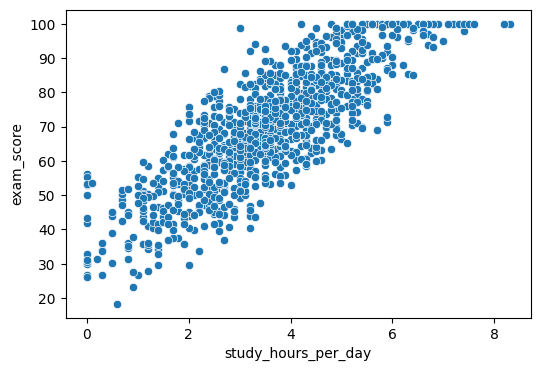

In [49]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.show()


Groupby Analysis

In [51]:
df.groupby('sleep_hours').mean(numeric_only=True)


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,exercise_frequency,mental_health_rating,exam_score
sleep_hours,,,,,,,,
3.2,24.000000,5.800000,3.000000,0.400000,66.500000,2.000000,8.000000,90.800000
3.3,19.333333,3.300000,3.433333,1.866667,80.933333,3.000000,7.666667,62.000000
3.4,23.000000,3.100000,3.500000,2.200000,78.800000,0.000000,7.000000,49.900000
3.5,23.500000,3.800000,1.400000,1.850000,80.700000,2.500000,4.000000,62.250000
3.6,19.000000,3.433333,2.133333,2.133333,78.800000,2.666667,5.000000,62.000000
...,...,...,...,...,...,...,...,...
9.5,22.000000,3.066667,2.833333,1.400000,83.800000,5.000000,6.333333,73.266667
9.6,24.000000,3.600000,0.000000,3.600000,66.300000,3.000000,2.000000,66.200000
9.7,18.500000,3.950000,3.050000,1.450000,81.950000,1.500000,5.500000,80.450000


Histogram with KDE

<Axes: xlabel='exam_score', ylabel='Count'>

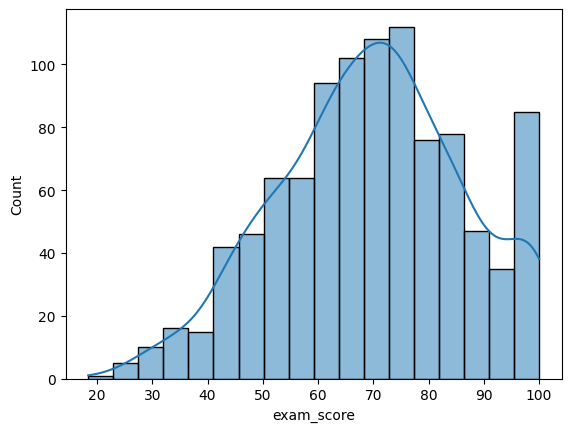

In [52]:
sns.histplot(df['exam_score'], kde=True)


Check Skewness & Kurtosis

In [56]:
df.skew(numeric_only=True)


,0
age,0.008437
study_hours_per_day,0.054253
social_media_hours,0.119805
netflix_hours,0.237154
attendance_percentage,-0.237810
sleep_hours,0.091484
exercise_frequency,-0.031923
mental_health_rating,0.037811
exam_score,-0.156351


In [57]:
df.skew(numeric_only=True)


,0
age,0.008437
study_hours_per_day,0.054253
social_media_hours,0.119805
netflix_hours,0.237154
attendance_percentage,-0.237810
sleep_hours,0.091484
exercise_frequency,-0.031923
mental_health_rating,0.037811
exam_score,-0.156351
